# Overview of some of the Python packages.

***Disclaimer: I am using the words library, module, and package very loosely. And to be honest it is difficult to keep the distictions entirely clear. Just we aware that I am not applying these terms by their true definition. For our purposes the distinctions are largely insignificant.***

So what is this module/package/library business. To be clear for once let's lay the defitions out and then promptly forget them.
<dl>
    <dt>Module</dt>
    <dd>Simply a python file which contains python functions, global variables etc. It is an easy way to store and execute functions and tasks across python programs.</dd>
    <dt>Package</dt>
    <dd>A package is a collection of modules in a directory. No real difference from a Library that often is interfaced with through an API. They are both just more robust collections of modules and packages</dd>
    <dt>Library</dt>
    <dd>The library is not a strict unit in Python but is also used to describe a container for multiple packages/modules in a directory that often is interfaced with through an API. No real difference from a Package. They are both just more robust collections of modules and packages</dd>
<dl>

## Resources:
[Python Data Analysis Library](https://pandas.pydata.org/)
<br/>
[Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)
<br/>A python tool for creating and anlaysing data structures.
<br/>
[Numpy Documentation](http://www.numpy.org/)<br/>
NumPy is the fundamental package for scientific computing with Python. Basically numpy is used for math and working wiht arrays.
[Scikit Learn Documentation](http://scikit-learn.org/stable/index.html)<br/>
Pythn tooks for basic machine learning, data mining, and data analysis.

## Numpy and Pandas


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

For example we can use numpy to generate a random array of integers and then use Pandas to put those in a data frame. 

In [4]:
values = np.random.randint(0,100,size=(60, 8))
values

array([[26,  8, 56, 18, 98, 16, 54, 55],
       [45, 74, 78, 41, 43, 25, 58, 84],
       [ 3, 31, 33, 19, 96, 80, 84, 98],
       [90, 95, 41, 76, 38, 84,  2, 75],
       [96, 42, 67, 68, 83,  6, 46, 96],
       [72, 54, 23, 20, 85, 61,  7, 82],
       [18, 78, 51, 45, 54, 24, 67, 40],
       [98, 81, 86, 71, 20, 47, 74, 56],
       [81, 11, 76,  2, 84, 49, 94, 71],
       [76, 86, 43, 35, 33, 16, 97, 97],
       [31, 81, 42, 89,  2, 49, 68, 64],
       [10, 63, 76, 77, 59,  3, 26, 96],
       [38, 40, 97, 45, 18, 16, 86,  1],
       [11, 89, 70, 39, 49, 29, 80, 28],
       [54, 91, 26, 96, 58, 67, 78, 72],
       [87, 63, 47, 56, 82, 90, 97, 97],
       [10, 27, 47, 18, 89, 42, 81, 66],
       [13, 57, 54, 20, 58, 14, 42, 25],
       [24, 34, 59, 23, 21, 33, 42, 85],
       [67, 26, 25, 89, 19, 48, 25, 30],
       [14, 96, 87, 33, 55,  5, 62, 52],
       [38, 84, 16,  2, 36, 59, 39, 84],
       [82, 36, 95,  4, 58, 64, 27, 92],
       [37, 73, 97, 57, 10,  6, 77, 97],
       [39, 14, 

In [5]:
values.shape

(60, 8)

In [3]:
# we can flatten the array, sommetimes useful in NLP.
r = np.ravel(values)
r

array([32, 95,  3, 67,  7, 74, 48, 43, 58, 47, 91, 30, 67, 63, 99, 57, 94,
       40, 13, 61, 74,  2, 83, 70, 71, 80, 34, 44, 97, 97, 16, 86, 33, 74,
        2, 21, 69, 97, 18, 20, 64, 87, 96, 96, 88, 61, 29,  3, 37, 99, 66,
       23, 22,  5, 64, 61, 12, 89, 79, 19, 18, 54, 26, 62, 93, 93, 52, 91,
        2, 97, 52, 66, 87, 34, 90, 98, 48, 19, 20, 88, 27, 70, 64, 49, 99,
       23, 23, 39, 66, 53, 20, 96, 77, 91, 22, 16,  3,  5, 80, 91, 65, 28,
       75, 65, 36, 76, 99,  7, 15, 28, 67, 88,  1, 12, 50, 21, 84, 93, 73,
       84, 56, 17, 48,  9, 72, 50, 26,  6, 95, 47, 69, 78, 70, 37, 65, 89,
       12, 89, 49, 66, 55, 99, 86, 65, 23, 82, 77, 62, 44,  0, 61, 52, 77,
       76, 22, 58, 74, 98, 44,  5, 71, 96, 15, 31, 94, 54, 33, 64, 45, 83,
       27, 57, 82, 51, 90, 31, 15,  6, 38, 54, 79, 60,  8, 42, 76, 35, 81,
       38, 84, 31,  5, 56, 26, 85, 52, 93, 36, 27, 75, 23, 13,  8, 65, 37,
       70, 51, 22, 67, 73, 63, 34, 31, 47, 57, 42, 64, 24, 63,  3, 47, 75,
       85, 68, 58, 85, 56

In [6]:
r.shape

(480,)

In [7]:
# create a dataframe from the array
data = pd.DataFrame(values,columns=['A','B','C','D','E','F','G','H'])

In [8]:
data

,A,B,C,D,E,F,G,H
0,26,8,56,18,98,16,54,55
1,45,74,78,41,43,25,58,84
2,3,31,33,19,96,80,84,98
3,90,95,41,76,38,84,2,75
4,96,42,67,68,83,6,46,96
5,72,54,23,20,85,61,7,82
6,18,78,51,45,54,24,67,40
7,98,81,86,71,20,47,74,56
8,81,11,76,2,84,49,94,71
9,76,86,43,35,33,16,97,97


Pandas and NumPy provide us with a myriad of ways to change, manipulate, analyze, and visualize data. 

In [9]:
data.describe()

,A,B,C,D,E,F,G,H
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,48.566667,55.166667,54.566667,45.533333,53.516667,41.633333,53.600000,52.833333
std,29.984949,28.556318,26.260989,26.688706,27.987583,28.104506,29.977506,30.260545
min,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,17.500000,30.500000,33.750000,24.500000,31.250000,16.000000,26.750000,26.750000
50%,49.000000,57.000000,54.500000,41.500000,55.000000,39.500000,55.500000,56.000000
75%,71.250000,81.500000,74.500000,68.000000,82.000000,62.500000,80.250000,79.000000
max,99.000000,98.000000,97.000000,96.000000,98.000000,93.000000,98.000000,98.000000


In [10]:
data

,A,B,C,D,E,F,G,H
0,26,8,56,18,98,16,54,55
1,45,74,78,41,43,25,58,84
2,3,31,33,19,96,80,84,98
3,90,95,41,76,38,84,2,75
4,96,42,67,68,83,6,46,96
5,72,54,23,20,85,61,7,82
6,18,78,51,45,54,24,67,40
7,98,81,86,71,20,47,74,56
8,81,11,76,2,84,49,94,71
9,76,86,43,35,33,16,97,97


### Visualizing the data

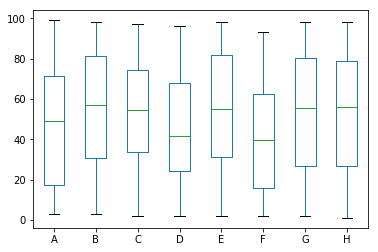

In [11]:
data.plot(kind='box')

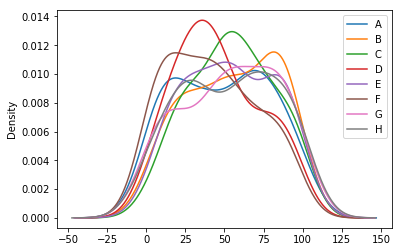

In [12]:
data.plot(kind='kde')

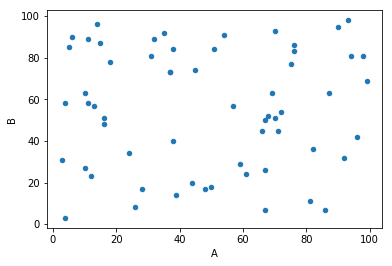

In [13]:
data.plot(kind='scatter',x='A',y='B')

<hr style="height:2px"/>
# Scikit Learn

Machine leanring is just an algoritm that a computer uses to make generalizations about data.

* [scikit-learn](http://scikit-learn.org/stable/)<br/>
This is and open source package built on several libraries: NumPy, SciPy, and matplotlib

## The Machine Learning Process
1. Define the problem and identify the research questionor problem statement (we need a purpose).
2. Find the Data
3. Prepare the data (munging)
4. Select the algorithm
5. Train the model
6. Test the model
7. Communicate/share results

## Types of Machine Learning algorithms:
* Classification: assign some data to a class. Is email spam.
* Regression: predict a value based on a set of features: based on location an dsize what is the price of a house.
* Clustering: looking for patterns in data. Categorizing text
* Rule Extraction: Recommendation engines. Given a set of data and some rules we can make a prediction.

### Example of machine learning with classification
Is a flower a daisy or a rose. 
The corpus is the set of data we have that gives us the information the algorithm will use to learn how to distinguish the characteristics of daisies and roses.

We need to choose and Algorithm.

When the algorithm is chosen we train it on a set of training data from the corpus. E.g. white pedals = daisy, red = rose.

Input vectors are the color of the pedal. The output we desire is what type of flower we get.



## Supervised and Unsupervised learning
### supervised
These algorithms that have labels associated with the training data that are used to correct and tune the model. For example, we have location and size data for a house and we want to predict the price. We know the labels (price) for some of the data and we want to learn how to predict cost in the future with. Using the data set we can adjust the model so that it can predict a target variable (e.g. price, our label). 

This data set has a set of feature vectors or variables, the x variables. 

The attribute that we want to predict is called the label, or the y variable.


### unsupervised
The model is set up to learn the patterns and structures in the data when we do not know what the correlations might be. Given a large set of data these algorithms look for relationships that are not apparent.

We have no labels, we do not know what our y variable is, and we only have the x variables. From this data unsupervised algorithms look for patterns.

Clustering is a common type of unsupervised machine learning, which is a method of identifying groups of similar content after an analysis of a selected group of features.

## Data types
### Continuous

This is data that has an infinite set of values in a range. These are values like salary, height, weight, age.

### Categorical Data
This is data that has a limited number of values. These are values like Month, color, day of the week, yes/no.

This type of data canot necessarily be ordered.


## Scaling Data
This is also called normalization. The purpose is to standardized the variability in feature details. The exam data below has student scores and it is not clear if they are scores out of 100, out of 120, etc. To work with this data we need to standardize it. 

## Feature Vectors

First know that a vector is simply a list of numbers (1,2,5,3). To visualize what this means for machine learning it helps to think of a 2-dimensional vector that can be plotted on a cartesian plane. 

<div style="text-align:center">
    <img src="images/vector2D.png" style="margin-top:2em;width:40%"/>
</div>

Vectors can contain a number of numbers, but it is difficult for us to visualize such a complicated system of values.

In machine learning each measurement we have is a feature. You can think of this as the columns in a table. If we are trying to determing the cost of a house, some features we might consider are the number of bedrooms, the square footage, the number of bathrooms, etc. These data points are our features and a collection of these data points for one house would be the feature vector for that house. 

The key is to identify features that can correlate to the target variable you want to predict. To continue the house example, including the weight of the home owner would probably not be a useful feature for determining the price of a house, while looking at the size of the house in square feet might be.

This is where domain knowledge is very valuable for identifying useful features. A environmental scientist could be better suited for identifying useful features when trying to predict climate change than a software developer. 

However, another way to look at feature determination is to look at it from a mathematical point of view and see what features correlate mathematically to the target variable best. This is often a useful approach and one that different algorithms rely on as well.

The combination of these two approaches is often the most effective. 

## Data Science Exercise - feature extraction: let's make some features

Let's look at some student exam data and see how we can scale some of the variables and transform some of the data into useful features (aka **feature extraction**).

In [14]:
import sklearn

First we bring the data into the notebook and save it as a Pandas dataframe

In [15]:
test_data = pd.read_csv('data/test.csv')
test_data

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,associate's degree,standard,completed,79,75,81
1,female,associate's degree,free/reduced,none,56,65,64
2,male,bachelor's degree,standard,none,86,68,74
3,female,bachelor's degree,standard,none,68,78,76
4,female,high school,free/reduced,none,49,68,61
5,male,some high school,free/reduced,none,49,47,41
6,male,some high school,standard,none,87,78,70
7,male,associate's degree,standard,none,74,80,76
8,female,some high school,standard,none,50,44,48
9,male,some college,standard,none,40,23,23


We don't know anything about this data except what we have in front of us in this instance. This may often be the case. Be careful to avoid assumptions. The score numbers look like they are percentages, but we have no way of confirming this. These could be points and we have no access to the scale. Scikit learn provides a means to standardize these data based on mean standard deviation.

In the cell below we will scale the data and assign the results back to the column.

In [16]:
from sklearn import preprocessing
test_data[['math score']] = preprocessing.scale(test_data[['math score']])
test_data[['reading score']] = preprocessing.scale(test_data[['reading score']])
test_data[['writing score']] = preprocessing.scale(test_data[['writing score']])

In [17]:
test_data

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,female,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,male,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,female,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,female,high school,free/reduced,none,-1.145810,0.053547,-0.395248
5,male,some high school,free/reduced,none,-1.145810,-1.508227,-1.840397
6,male,some high school,standard,none,1.565321,0.797248,0.255069
7,male,associate's degree,standard,none,0.637829,0.945989,0.688613
8,female,some high school,standard,none,-1.074464,-1.731338,-1.334595
9,male,some college,standard,none,-1.787920,-3.293112,-3.141031


### One hot encoding for categorical data
This identifies a value and uses a 0 or 1 to indicate if it is part of a category or not. We can do this type of categorization easily with scikit learn's LabelEncoder. It can generate this type of encoding automatically for a column. 

Gender is a perfect column for this type of feature extraction. A computer can do nothing with the values "female/male" (e.g. what is "male" + "male"?). However a computer can evaluate the number 1 or 0. So we can use 0 t indicate "female" and 1 to indicate "male".


In [18]:
# This let's the LabelEncoder know what type of data it is going to be handling. 
le = preprocessing.LabelEncoder()
le.fit(test_data['gender'])

LabelEncoder()

The classes reflect the labels of the original data.

In [19]:
le.classes_

array(['female', 'male'], dtype=object)

Now we can use the LabelEncoder to replace the data inthe gender column.

In [20]:
test_data['gender'] = le.transform(test_data['gender'])

In [21]:
test_data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,0,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,1,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,0,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,0,high school,free/reduced,none,-1.145810,0.053547,-0.395248


Pandas also has a great way to do this kind of "one hot encoding". 

In [23]:
# this will return a new dataframe of the one hot data.
pd.get_dummies(test_data['parental level of education'])

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,0,0,1
6,0,0,0,0,0,1
7,1,0,0,0,0,0
8,0,0,0,0,0,1
9,0,0,0,0,1,0


In [24]:
test_data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,0,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,1,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,0,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,0,high school,free/reduced,none,-1.145810,0.053547,-0.395248


Now we put this in our original test_data dataframe.

In [25]:
test_data = pd.get_dummies(test_data, columns=['parental level of education'])

In [26]:
test_data.head()

,gender,lunch,test preparation course,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,standard,completed,0.994557,0.574138,1.049901,1,0,0,0,0,0
1,0,free/reduced,none,-0.646391,-0.169564,-0.178476,1,0,0,0,0,0
2,1,standard,none,1.493976,0.053547,0.544099,0,1,0,0,0,0
3,0,standard,none,0.209756,0.797248,0.688613,0,1,0,0,0,0
4,0,free/reduced,none,-1.145810,0.053547,-0.395248,0,0,1,0,0,0


We can look at the "test preparation course" column and see what values we have there.

In [27]:
# can this also be one hot encoded.
test_data['test preparation course'].value_counts()

none         61
completed    39
Name: test preparation course, dtype: int64

Let's transform the rest of our columns to one hot encoding data so the computer can make sense of it. 

In [28]:
test_data = pd.get_dummies(test_data, columns=['lunch','test preparation course'])

In [29]:
test_data.head()

,gender,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0.994557,0.574138,1.049901,1,0,0,0,0,0,0,1,1,0
1,0,-0.646391,-0.169564,-0.178476,1,0,0,0,0,0,1,0,0,1
2,1,1.493976,0.053547,0.544099,0,1,0,0,0,0,0,1,0,1
3,0,0.209756,0.797248,0.688613,0,1,0,0,0,0,0,1,0,1
4,0,-1.145810,0.053547,-0.395248,0,0,1,0,0,0,1,0,0,1


In [30]:
test_data.tail()

,gender,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
95,0,-0.432354,0.648508,0.977643,0,0,0,1,0,0,1,0,1,0
96,0,-0.361008,-0.392675,-0.395248,0,0,1,0,0,0,1,0,0,1
97,0,0.281101,1.094729,1.194416,0,0,0,0,1,0,0,1,0,1
98,1,1.708013,1.169099,0.905386,0,0,0,0,0,1,0,1,0,1
99,0,-0.004281,1.540950,1.555703,0,0,0,1,0,0,1,0,1,0


In [31]:
test_data.describe()

,gender,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.520000,-1.569318e-16,-1.443290e-16,6.217249e-17,0.15000,0.070000,0.230000,0.110000,0.21000,0.230000,0.400000,0.600000,0.390000,0.610000
std,0.502117,1.005038e+00,1.005038e+00,1.005038e+00,0.35887,0.256432,0.422953,0.314466,0.40936,0.422953,0.492366,0.492366,0.490207,0.490207
min,0.000000,-2.287338e+00,-3.293112e+00,-3.141031e+00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-6.463907e-01,-6.901553e-01,-7.565355e-01,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-7.562629e-02,5.354653e-02,1.105539e-01,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,6.378292e-01,6.671006e-01,6.886135e-01,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.421468e+00,2.433392e+00,2.278277e+00,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we have a collection of features that can be processed mathematically by a computer. 

### Data visualization and Exploration

If we plot out the dat for the scores we can see that there seems to be a strong corelation between reading score and writing score. 

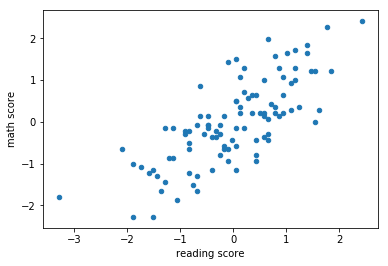

In [32]:
%matplotlib inline
test_data.plot(kind='scatter',x='reading score',y='math score')

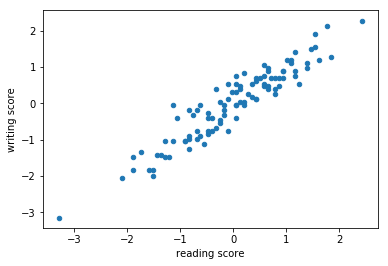

In [33]:
test_data.plot(kind='scatter',x='reading score',y='writing score')

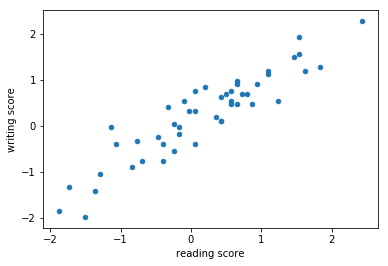

In [39]:
test_data[test_data['gender']==0].plot(kind='scatter',x='reading score',y='writing score')

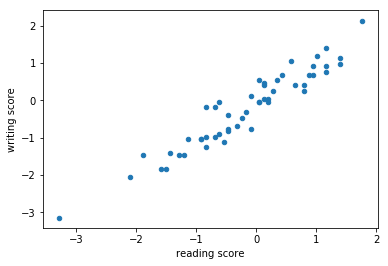

In [40]:
test_data[test_data['gender']==1].plot(kind='scatter',x='reading score',y='writing score')

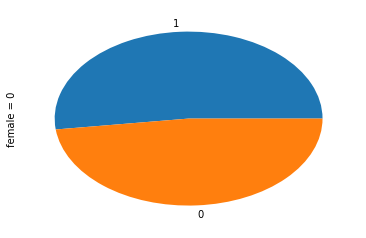

In [41]:
test_data['gender'].value_counts().plot(kind='pie', x='lunch_standard', label="female = 0")



## Using numeric data to analyze text
So what does this mean for text data?

How can we use numeric data to analyze text. Let's think about this in the context of a sentiment analyzer for a review. Imagine our review of the movie is: "This was the best movie!"

We can imagine our `text = 'This was the best movie!'`

Well we can tokenize it to `tokens = ['This', 'was', 'the', 'best', 'movie']`

We could use one hot method on the set of vocabulary so that if a sentence has certain words we can esatblish a correlation. For example, the `tokens` document would become something like `[('This',1),('was',1), ('the',1), ('best',1), ('movie',1)].`

Probelms with this is that it does not count frequency if we reduce its vocabulary to generate the one hot integers. It also doe not take into account order. And as the corpus grows its vocabulary the matrix becomes enormous, more like a sparse matrix. This is not a very intelligent way to represent the sentence information.

A better method is Frequence based embeddings. 

### Frequency based embeddings
These rely on count (how many times a word has occured in a document) and Term Frequency - Inverse Document Frequency(TF-IDF)
#### Count
If we see that the word 'bad' occurs more frequently in a review then we can say the movie is reviewed negatively. 

Problems arise here agian:
* If the corpus is very large then again we have a huge set of feature vectors (the vocabulary). 
* We are still losing the context of the words.
* Semantics and relationships are not preserved

Some solutions to deal with a large vocabulary could be to limit the number of words we choose. We could rely on the top 50 words in our word count but we have seen before that this favors words that might not convey any useful information (e.g. "a", "the", "an"). To remedy this we may filter out stopwords that do not affect the sentiment of a review.

Another method is to hash words to buckets to reduce the vocabulary size. This means if we have 10,000 words we can create 8,000 buckets. We need to be careful to not create buckets that minimize the amount of collisions, that is we don't have two words that map to the same bucket. For example we could put the words "actor" and "actress" into one bucket if we are trying to evalute if a review is describing good or bad acting. THese two words are now treated as one and counted as one. So the the sentence "the actor was great and the actress was unknown" would get 2 counts for the "actor, actress" bucket. We would never know that these are separate words however in our count, only that this bucket has a higher count than other buckets.

#### TF-IDF (term frequency - inverse document frequency)
This is a measure of how often a word occurs in a document compared to how often it occurs in a corpus.

TF-IDF looks at how often a term appears in a single document. So the more often a word appears in the document it is likely to be considered important. This is considered against how often a word appears in the corpus. So the logic is that a word that appears more frequently in a document but less frequently in the corpus is a significant term for that document. 

This has the advantage of reducing the feature vector size and giving relevance to frequency in a document. However we still have the draw back that the context of the word is not captured.



## Vectorizing data (aka turning text into numbers)
We will start with a very small corpus of data so we can see what is going on

In [42]:
# a small corpus of four documents.
corpus = ['The first wish I have is for a dog. I love dogs.',
         'The second wish I have is for a cat.',
         'Is the third wish on my wish list a polar bear? Is it?',
         'Number four of the things I want is a cow. Number four, cow. Yup.',
         'The last thing I ever want is a hot dog']

Try using the Notebooks `shift + tab` feature to learn more about how the countVectorizer works. also note we are taking it from a submodule of Scikit Learn called `feature_extraction.text`. This submidule provides tools for building feature vectors from text documents.  

In [43]:
# This is a simple frequency based vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# set up the vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
word_count = vectorizer.transform(corpus)

Note we have creates a sparse matrix. This is just a matrix that contains a lot of empty, or 0, vlaues, which is often the case when working with word counts in a corpus.

In [45]:
word_count

<5x29 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [46]:
# this will show the matrix broken up by document, word represented by an integer and word count. 
# Note that the order of the array does not reflect the order of the documents in the corpus.

print(word_count)

  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 7)	1
  (0, 9)	1
  (0, 11)	1
  (0, 15)	1
  (0, 22)	1
  (0, 27)	1
  (1, 1)	1
  (1, 7)	1
  (1, 9)	1
  (1, 11)	1
  (1, 21)	1
  (1, 22)	1
  (1, 27)	1
  (2, 0)	1
  (2, 11)	2
  (2, 12)	1
  (2, 14)	1
  (2, 16)	1
  (2, 19)	1
  (2, 20)	1
  (2, 22)	1
  (2, 25)	1
  (2, 27)	2
  (3, 2)	2
  (3, 8)	2
  (3, 11)	1
  (3, 17)	2
  (3, 18)	1
  (3, 22)	1
  (3, 24)	1
  (3, 26)	1
  (3, 28)	1
  (4, 3)	1
  (4, 5)	1
  (4, 10)	1
  (4, 11)	1
  (4, 13)	1
  (4, 22)	1
  (4, 23)	1
  (4, 26)	1


<p>If we take one of these lines, `(4,26)     1`, 4 indicates the document (remember not necessarily the 4th documentas our corpus is laid out), 26 is the word id, and the trailing 1 is the count. </p>
<p>Let's take an even closer look at what is in this matrix.</p>


In [47]:
# we can see the id of a word:
vectorizer.vocabulary_.get('wish')

27

In [48]:
# look at the entire vocabulary and the ids
vectorizer.vocabulary_

{'bear': 0,
 'cat': 1,
 'cow': 2,
 'dog': 3,
 'dogs': 4,
 'ever': 5,
 'first': 6,
 'for': 7,
 'four': 8,
 'have': 9,
 'hot': 10,
 'is': 11,
 'it': 12,
 'last': 13,
 'list': 14,
 'love': 15,
 'my': 16,
 'number': 17,
 'of': 18,
 'on': 19,
 'polar': 20,
 'second': 21,
 'the': 22,
 'thing': 23,
 'things': 24,
 'third': 25,
 'want': 26,
 'wish': 27,
 'yup': 28}

Notice 'dog' and 'dogs' are counted separately.

In [49]:
# get a list of the feature names.
vectorizer.get_feature_names()

['bear',
 'cat',
 'cow',
 'dog',
 'dogs',
 'ever',
 'first',
 'for',
 'four',
 'have',
 'hot',
 'is',
 'it',
 'last',
 'list',
 'love',
 'my',
 'number',
 'of',
 'on',
 'polar',
 'second',
 'the',
 'thing',
 'things',
 'third',
 'want',
 'wish',
 'yup']


Now let's look at this information as data in a data frame using pandas.

In [50]:
corpus_data = pd.DataFrame(word_count.toarray(), columns=vectorizer.get_feature_names())
corpus_data

,bear,cat,cow,dog,dogs,ever,first,for,four,have,...,on,polar,second,the,thing,things,third,want,wish,yup
0,0,0,0,1,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,2,0
3,0,0,2,0,0,0,0,0,2,0,...,0,0,0,1,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


Now we could do some data exploration with pandas if we wanted.

We don't have enough data here but if we had several more hundreds of rows we might want to use unsupervised learning to look for patterns in these "documents". Hopefuly we would see that the alogrithm would group them into wishes for dogs, wish for cats, and wishes for cows or bears. 

### TF-IDF Vectorizer

Now lets work with the TF-IDF vectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(corpus)
word_tfidf = tfidf.transform(corpus)

In [52]:
# Here we will see a simlar matrix.
# In this case each vocabulary word gets a td-idf score in stead of a count.
print(word_tfidf)

  (0, 27)	0.2767645350941349
  (0, 22)	0.19692024618574533
  (0, 15)	0.4132592485329547
  (0, 11)	0.19692024618574533
  (0, 9)	0.3334149596245651
  (0, 7)	0.3334149596245651
  (0, 6)	0.4132592485329547
  (0, 4)	0.4132592485329547
  (0, 3)	0.3334149596245651
  (1, 27)	0.32661243437353615
  (1, 22)	0.23238743707638176
  (1, 21)	0.48769113118058194
  (1, 11)	0.23238743707638176
  (1, 9)	0.3934661338834275
  (1, 7)	0.3934661338834275
  (1, 1)	0.48769113118058194
  (2, 27)	0.4250672318508807
  (2, 25)	0.31735092928530484
  (2, 22)	0.15121941818358098
  (2, 20)	0.31735092928530484
  (2, 19)	0.31735092928530484
  (2, 16)	0.31735092928530484
  (2, 14)	0.31735092928530484
  (2, 12)	0.31735092928530484
  (2, 11)	0.30243883636716196
  (2, 0)	0.31735092928530484
  (3, 28)	0.24918346480464545
  (3, 26)	0.2010396504177084
  (3, 24)	0.24918346480464545
  (3, 22)	0.11873725611451098
  (3, 18)	0.24918346480464545
  (3, 17)	0.4983669296092909
  (3, 11)	0.11873725611451098
  (3, 8)	0.4983669296092909
  (

We can access this matrix much in the same way we accessed the countVectorizer matrix.

In [54]:
tfidf.vocabulary_

{'bear': 0,
 'cat': 1,
 'cow': 2,
 'dog': 3,
 'dogs': 4,
 'ever': 5,
 'first': 6,
 'for': 7,
 'four': 8,
 'have': 9,
 'hot': 10,
 'is': 11,
 'it': 12,
 'last': 13,
 'list': 14,
 'love': 15,
 'my': 16,
 'number': 17,
 'of': 18,
 'on': 19,
 'polar': 20,
 'second': 21,
 'the': 22,
 'thing': 23,
 'things': 24,
 'third': 25,
 'want': 26,
 'wish': 27,
 'yup': 28}

In [56]:
corpus_data = pd.DataFrame(word_tfidf.toarray(), columns=tfidf.get_feature_names())
corpus_data

,bear,cat,cow,dog,dogs,ever,first,for,four,have,...,on,polar,second,the,thing,things,third,want,wish,yup
0,0.000000,0.000000,0.000000,0.333415,0.413259,0.000000,0.413259,0.333415,0.000000,0.333415,...,0.000000,0.000000,0.000000,0.196920,0.000000,0.000000,0.000000,0.000000,0.276765,0.000000
1,0.000000,0.487691,0.000000,0.000000,0.000000,0.000000,0.000000,0.393466,0.000000,0.393466,...,0.000000,0.000000,0.487691,0.232387,0.000000,0.000000,0.000000,0.000000,0.326612,0.000000
2,0.317351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.317351,0.317351,0.000000,0.151219,0.000000,0.000000,0.317351,0.000000,0.425067,0.000000
3,0.000000,0.000000,0.498367,0.000000,0.000000,0.000000,0.000000,0.000000,0.498367,0.000000,...,0.000000,0.000000,0.000000,0.118737,0.000000,0.249183,0.000000,0.201040,0.000000,0.249183
4,0.000000,0.000000,0.000000,0.336282,0.000000,0.416813,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.198614,0.416813,0.000000,0.000000,0.336282,0.000000,0.000000


We do not have a large vocabulary but imagine we do. Maybe we would want to reduce the feature count we could hash the features. Scikit Learn also gives us a hashing tool.

In [59]:
from sklearn.feature_extraction.text import HashingVectorizer

# here n_features is n number of buckets
hashing = HashingVectorizer(n_features=18)
word_hash = hashing.fit_transform(corpus)
print(word_hash)

  (0, 0)	0.3333333333333333
  (0, 1)	0.6666666666666666
  (0, 2)	-0.3333333333333333
  (0, 3)	-0.3333333333333333
  (0, 12)	-0.3333333333333333
  (0, 15)	-0.3333333333333333
  (0, 17)	0.0
  (1, 0)	0.3333333333333333
  (1, 1)	0.6666666666666666
  (1, 7)	0.3333333333333333
  (1, 12)	-0.3333333333333333
  (1, 13)	0.3333333333333333
  (1, 15)	-0.3333333333333333
  (2, 0)	0.5345224838248488
  (2, 1)	0.5345224838248488
  (2, 5)	-0.2672612419124244
  (2, 6)	0.2672612419124244
  (2, 8)	0.2672612419124244
  (2, 9)	0.0
  (2, 11)	-0.2672612419124244
  (2, 12)	-0.2672612419124244
  (2, 14)	0.2672612419124244
  (3, 0)	0.20412414523193154
  (3, 1)	0.20412414523193154
  (3, 7)	0.8164965809277261
  (3, 8)	0.20412414523193154
  (3, 12)	-0.20412414523193154
  (3, 13)	0.4082482904638631
  (3, 17)	0.0
  (4, 1)	0.4082482904638631
  (4, 3)	-0.4082482904638631
  (4, 8)	0.4082482904638631
  (4, 12)	-0.4082482904638631
  (4, 13)	0.4082482904638631
  (4, 17)	-0.4082482904638631


Notice that now where we had our word count up to 27, now we only have 18 values (0-17) and the frequency is not represented as a count but as some normalized data. One downside to hashing is that we have lost the link back to the vocabulary, so tracing back is not possible.


In [58]:
word_hash.get_feature_names()

AttributeError: get_feature_names not found

In [60]:
word_hash.get_shape()

(5, 18)

In [61]:
hash_data = pd.DataFrame(word_hash.toarray())

In [62]:
hash_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.333333,0.666667,-0.333333,-0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-0.333333,0.000000,0.000000,-0.333333,0.0,0.000000
1,0.333333,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.000000,-0.333333,0.333333,0.000000,-0.333333,0.0,0.000000
2,0.534522,0.534522,0.000000,0.000000,0.0,-0.267261,0.267261,0.000000,0.267261,0.0,0.0,-0.267261,-0.267261,0.000000,0.267261,0.000000,0.0,0.000000
3,0.204124,0.204124,0.000000,0.000000,0.0,0.000000,0.000000,0.816497,0.204124,0.0,0.0,0.000000,-0.204124,0.408248,0.000000,0.000000,0.0,0.000000
4,0.000000,0.408248,0.000000,-0.408248,0.0,0.000000,0.000000,0.000000,0.408248,0.0,0.0,0.000000,-0.408248,0.408248,0.000000,0.000000,0.0,-0.408248
